In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/aug_train.csv")


In [3]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.dtypes

enrollee_id                  int64
city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
target                     float64
dtype: object

In [4]:
data.gender.astype('category').cat.codes
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [31]:
df = (data.dropna(axis = 0)
    #.drop(columns='target')
    .rename(columns = {"city_development_index": "city_index"})
    .sort_values("city_index", ascending= True)
    .loc[:, ["gender", "company_type", "training_hours", "target"]]
)
df

,gender,company_type,training_hours,target
16555,Male,Pvt Ltd,16,0.0
10401,Male,Pvt Ltd,36,0.0
7724,Male,Pvt Ltd,28,0.0
17701,Male,Public Sector,44,1.0
16362,Male,Other,43,0.0
...,...,...,...,...
16947,Male,Pvt Ltd,134,0.0
2449,Male,Pvt Ltd,67,0.0
18537,Male,Pvt Ltd,105,0.0
2929,Male,Pvt Ltd,14,0.0


In [32]:
df['gender_code'] = df.gender.astype('category').cat.codes
df['company_type_code'] = df.company_type.astype('category').cat.codes

<AxesSubplot:ylabel='Frequency'>

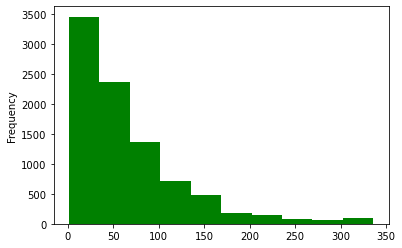

In [33]:
df['training_hours'].plot(kind='hist', facecolor='green')

<AxesSubplot:>

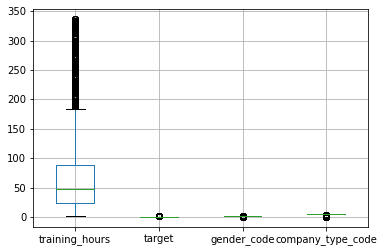

In [34]:
df.boxplot()

<AxesSubplot:>

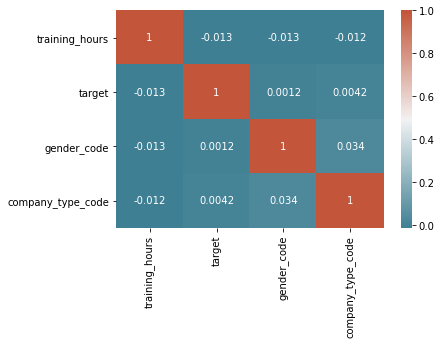

In [35]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

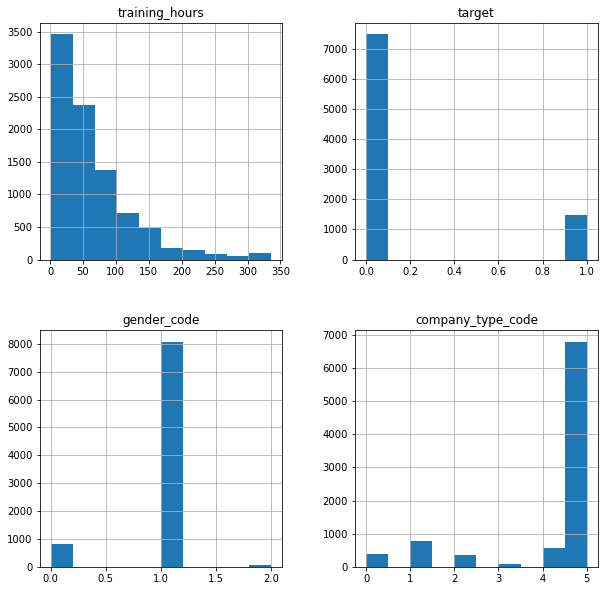

In [36]:
hist = df.hist(bins=10, figsize=(10, 10))

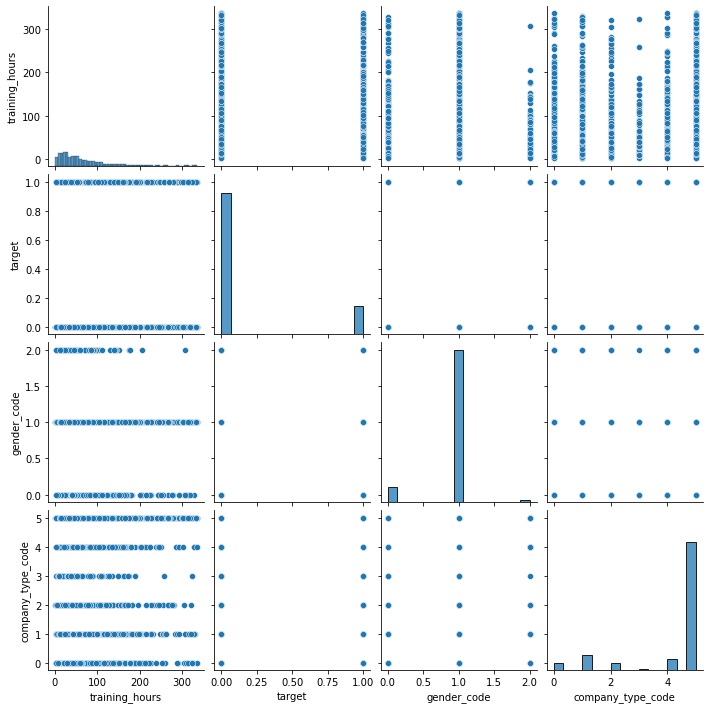

In [37]:
sns.pairplot(df)

<AxesSubplot:xlabel='gender'>

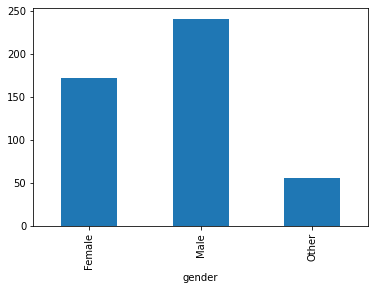

In [38]:
df.groupby('gender')['training_hours'].nunique().plot(kind = 'bar')


<AxesSubplot:xlabel='company_type'>

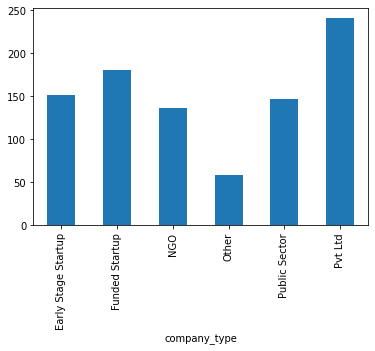

In [39]:
df.groupby('company_type')['training_hours'].nunique().plot(kind = 'bar')

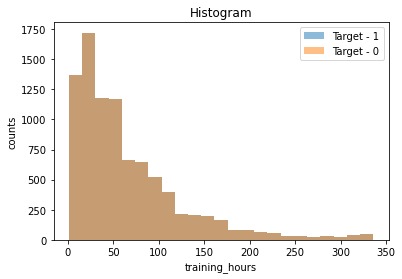

In [40]:
df['gender'].value_counts()/df['gender'].count()

plt.hist(df['training_hours'], bins=23, alpha=0.5, label='Target - 1')
plt.hist(df['training_hours'], bins=23, alpha=0.5, label='Target - 0')
plt.legend(loc='upper right')
plt.title('Histogram')
plt.xlabel('training_hours')
plt.ylabel('counts')
plt.show() # right skewed

In [41]:

male_newjob = df[(df['gender']=='Male') & (df['target']==1)]
female_newjob = df[(df['gender']=='Female') & (df['target']==1)]
print('{} % of male looking for a new job'.format(len(male_newjob)/len(df['gender']=='Male')*100))
print('{} % of female looking for a new job'.format(len(female_newjob)/len(df['gender']=='Female')*100))


14.963707426018985 % of male who are looking for a new job
1.4628699050809604 % of female who are looking for a new job


/Users/linfan-mini/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'skew: 1.8492692097565155')

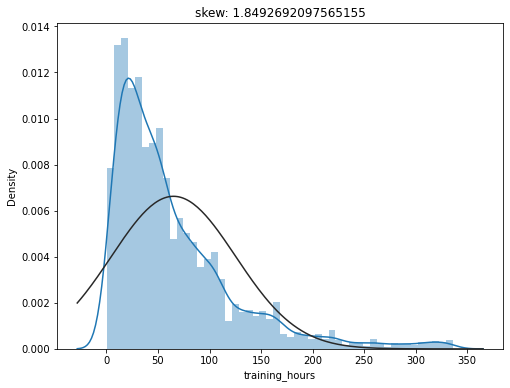

In [42]:
from scipy.stats import norm, skew
plt.figure(figsize=(8,6))
sns.distplot(df['training_hours'],fit=norm)
plt.title('skew: {}'.format(skew(df['training_hours'])))

/Users/linfan-mini/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_type', ylabel='count'>

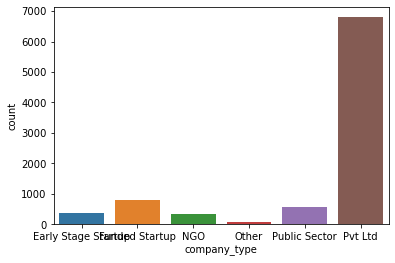

In [43]:
sns.countplot(df['company_type'])

In [45]:
for i in df['company_type'].unique():
    company_newjob=df[(df['company_type']==i)&df['target']==1]
    print('{} % of {} are looking for a new job'.format(len(company_newjob)/len(df['company_type']==i)*100,i))

12.652149637074261 % of Pvt Ltd are looking for a new job
1.0496929089893914 % of Public Sector are looking for a new job
0.16750418760469013 % of Other are looking for a new job
1.2060301507537687 % of Funded Startup are looking for a new job
0.6141820212171971 % of NGO are looking for a new job
0.8710217755443885 % of Early Stage Startup are looking for a new job
